In [1]:
from helper import *
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [2]:
fo = pd.ExcelFile('cleaned2013.xls') 
# clean-data.xlsx
df = pd.read_excel(fo, 'Sheet1')
print(df)

                                                   text
0     implementasi high availability vpn client jari...
1     pembangunan media pembelajaran teknik komputer...
2     penggunaan sistem ids intrution detection syst...
3     rancang bangun aplikasi monitoring jaringan si...
4     perancangan jaringan hotspot mikrotik router os 3
5     perancangan program simulasi perintah dasar ja...
6     jaringan virtual private network keamanan komu...
7     pembuatan jaringan local area network laborato...
8     sistem keamanan honeypot ids jaringan nirkabel...
9     analisis perbandingan load balancing web serve...
10    perbandingan unjuk kerja protokol routing ad h...
11    analisis qos jaringan multi protocol label swi...
12    teknik eksplorasi bukti digital file sharing p...
13    perbandingan metode simple queues queues tree ...
14    pemanfaatan local area network program netop s...
15    membangun privileges jaringan komputer sma neg...
16      perancangan jaringan sma muhammadiyah su

In [3]:
#drop empty line
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

text = df['text']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list[:1])

7711
[['implementasi', 'high', 'availability', 'vpn', 'client', 'jaringan', 'komputer', 'fakultas', 'hukum', 'universitas', 'udayana']]


In [4]:
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs, minimum count 5 means only that appear 5 times or more.
bigram = Phrases(text_list, min_count=5)
trigram = Phrases(bigram[text_list], min_count=5)

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
            
print(text_list)

[['implementasi', 'high', 'availability', 'vpn', 'client', 'jaringan', 'komputer', 'fakultas', 'hukum', 'universitas', 'udayana', 'jaringan_komputer', 'jaringan_komputer', 'jaringan_komputer'], ['pembangunan', 'media', 'pembelajaran', 'teknik', 'komputer', 'jaringan', 'kelas', 'x', 'semster', 'ganjil', 'sekolah', 'menengah', 'kejuruan', 'taruna', 'bangsa', 'pati', 'multimedia', 'media_pembelajaran', 'kelas_x', 'sekolah_menengah', 'media_pembelajaran', 'kelas_x', 'sekolah_menengah', 'media_pembelajaran', 'kelas_x', 'sekolah_menengah'], ['penggunaan', 'sistem', 'ids', 'intrution', 'detection', 'system', 'pengamanan', 'jaringan', 'komputer', 'detection_system', 'jaringan_komputer', 'jaringan_komputer', 'detection_system', 'jaringan_komputer'], ['rancang', 'bangun', 'aplikasi', 'monitoring', 'jaringan', 'simple', 'network', 'management', 'protocol', 'rancang_bangun', 'rancang_bangun', 'rancang_bangun'], ['perancangan', 'jaringan', 'hotspot', 'mikrotik', 'router', 'os', '3', 'mikrotik_route

In [5]:
phrasedf = pd.DataFrame(text_list)
print(phrasedf)

                 0               1              2              3   \
0      implementasi            high   availability            vpn   
1       pembangunan           media   pembelajaran         teknik   
2        penggunaan          sistem            ids      intrution   
3           rancang          bangun       aplikasi     monitoring   
4       perancangan        jaringan        hotspot       mikrotik   
5       perancangan         program       simulasi       perintah   
6          jaringan         virtual        private        network   
7         pembuatan        jaringan          local           area   
8            sistem        keamanan       honeypot            ids   
9          analisis    perbandingan           load      balancing   
10     perbandingan           unjuk          kerja       protokol   
11         analisis             qos       jaringan          multi   
12           teknik      eksplorasi          bukti        digital   
13     perbandingan          metod

In [6]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=1, no_above=0.5)
print(dictionary)

Dictionary(10660 unique tokens: ['availability', 'client', 'fakultas', 'high', 'hukum']...)


In [7]:
#build bag of words (corpus)
bow = [dictionary.doc2bow(doc) for doc in text_list]

print(len(bow))
# print(doc_term_matrix[100])

# calculate TF-IDF
tfidf = models.TfidfModel(bow)
corpus_tfidf = tfidf[bow]
# similarity = pd.DataFrame(corpus_tfidf, columns=['Topic']).to_csv("similarity.csv")

# print(corpus_tfidf)

# feature_names = tfidf.get_feature_names()
# corpus_index = [n for n in corpus_tfidf]

# showme = pd.DataFrame(tfs.T.todense(), index=feature_names, columns=corpus_index)
# print(showme)

# for i in corpus_tfidf:
#     result = pd.DataFrame()
#     result = result.append(pd.Series(corpus_tfidf), ignore_index=True)
#     print(result)

7711


In [8]:
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    np.random.seed(9)
    model_list = []
    num_topics = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

# num_topics

In [9]:
start=2
limit=20
step=2
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)

In [10]:
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 10))

Num Topics = 2  has Coherence Value of 0.278242329
Num Topics = 4  has Coherence Value of 0.3184305138
Num Topics = 6  has Coherence Value of 0.3788972111
Num Topics = 8  has Coherence Value of 0.3829159827
Num Topics = 10  has Coherence Value of 0.4358684538
Num Topics = 12  has Coherence Value of 0.4535713513
Num Topics = 14  has Coherence Value of 0.4521300277
Num Topics = 16  has Coherence Value of 0.4774732596
Num Topics = 18  has Coherence Value of 0.470888118


In [12]:
from pprint import pprint

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=16)
pprint(model.print_topics())

[(0,
  '0.018*"analisis_perancangan" + 0.018*"sms_gateway" + '
  '0.013*"rekayasa_perangkat" + 0.010*"siswa_kelas" + '
  '0.010*"analisa_perancangan" + 0.007*"teknologi_informasi" + '
  '0.007*"studi_kasus" + 0.007*"informasi" + 0.007*"sms" + '
  '0.006*"perancangan"'),
 (1,
  '0.027*"sistem_pendukung" + 0.016*"keputusan_pemilihan" + 0.012*"sma_negeri" '
  '+ 0.012*"pendukung" + 0.012*"keputusan" + 0.010*"studi_kasus" + '
  '0.009*"metode_simple" + 0.009*"keputusan_penentuan" + 0.009*"metode_ahp" + '
  '0.009*"pemilihan"'),
 (2,
  '0.012*"program_studi" + 0.011*"universitas_widyatama" + '
  '0.010*"metode_profile" + 0.010*"sistem_pendukung" + '
  '0.007*"pembelajaran_bahasa" + 0.007*"provinsi_jawa" + 0.006*"program" + '
  '0.005*"evaluasi_kinerja" + 0.005*"rancang_bangun" + '
  '0.005*"informasi_geografis"'),
 (3,
  '0.015*"web_service" + 0.014*"perangkat_lunak" + 0.012*"e_commerce" + '
  '0.006*"hasil_belajar" + 0.006*"mata_pelajaran" + '
  '0.006*"desain_implementasi" + 0.006*"cloud_

In [13]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=16)

for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.011*"platform_android" + 0.011*"e_commerce" + 0.008*"studi_kasus" + 0.006*"aplikasi" + 0.006*"pembuatan_aplikasi" + 0.006*"umum_kota" + 0.005*"pemesanan_makanan" + 0.005*"universitas_bina" + 0.005*"android" + 0.005*"mikrotik_router"
Topic: 1 Word: 0.013*"metode_ahp" + 0.011*"universitas_widyatama" + 0.010*"metode_saw" + 0.007*"pengolahan_data" + 0.006*"studi_kasus" + 0.006*"sekolah_menengah" + 0.006*"informasi_penggajian" + 0.005*"informasi" + 0.005*"sistem_informasi" + 0.005*"fasilitas_umum"
Topic: 2 Word: 0.019*"sms_gateway" + 0.012*"hasil_belajar" + 0.009*"analisa_perancangan" + 0.009*"basis_data" + 0.008*"rancang_bangun" + 0.008*"sms" + 0.007*"mata_pelajaran" + 0.007*"gateway" + 0.006*"studi_kasus" + 0.006*"provinsi_jawa"
Topic: 3 Word: 0.017*"rekayasa_perangkat" + 0.010*"fakultas_teknik" + 0.007*"studi_kasus" + 0.007*"rancang_bangun" + 0.007*"metode_certainty" + 0.006*"perpustakaan" + 0.006*"kota_palembang" + 0.006*"mobile_phone" + 0.006*"rekayasa" + 0.005*"open_s

# Dominant topic and its percentage contribution in each document

In [14]:
def format_topics_sentences(ldamodel=None, corpus=bow, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        # check notes 28/9
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(model, corpus=bow, texts=text_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['No_Dokumen', 'Topik_Dominan', 'Persentase_Kontribusi', 'Kata_Kunci', 'Teks']
df_dominant_topic.head(247)

,No_Dokumen,Topik_Dominan,Persentase_Kontribusi,Kata_Kunci,Teks
0,0,12.0,0.6109,"informasi_geografis, sistem_operasi, operasi, ...","[implementasi, high, availability, vpn, client..."
1,1,14.0,0.7210,"web_service, wisata, keputusan_penilaian, penu...","[pembangunan, media, pembelajaran, teknik, kom..."
2,2,4.0,0.9375,"operasi_android, rancang_bangun, program_studi...","[penggunaan, sistem, ids, intrution, detection..."
3,3,4.0,0.4157,"operasi_android, rancang_bangun, program_studi...","[rancang, bangun, aplikasi, monitoring, jaring..."
4,4,0.0,0.8173,"platform_android, e_commerce, studi_kasus, apl...","[perancangan, jaringan, hotspot, mikrotik, rou..."
5,5,3.0,0.6554,"rekayasa_perangkat, fakultas_teknik, studi_kas...","[perancangan, program, simulasi, perintah, das..."
6,6,11.0,0.4436,"diagnosa_penyakit, sekolah_menengah, sistem_in...","[jaringan, virtual, private, network, keamanan..."
7,7,13.0,0.5321,"php_mysql, informasi_manajemen, pengambilan_ke...","[pembuatan, jaringan, local, area, network, la..."
8,8,0.0,0.9062,"platform_android, e_commerce, studi_kasus, apl...","[sistem, keamanan, honeypot, ids, jaringan, ni..."
9,9,0.0,0.6685,"platform_android, e_commerce, studi_kasus, apl...","[analisis, perbandingan, load, balancing, web,..."


In [15]:
# Generate dataframe from list and write to xlsx.
pd.DataFrame(df_dominant_topic, columns=['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']).to_excel('topics.xls', header=True, index=False)

In [16]:
count_topics = df_dominant_topic['Topik_Dominan'].value_counts()
count_topics

7.0     890
9.0     727
4.0     608
2.0     567
13.0    500
8.0     480
0.0     438
5.0     437
1.0     433
10.0    427
3.0     415
14.0    387
11.0    361
15.0    357
6.0     346
12.0    338
Name: Topik_Dominan, dtype: int64

In [17]:
# matplotlib inline

Text(0.5,1,'Persebaran Banyak Judul Penelitian Berdasarkan Topik')

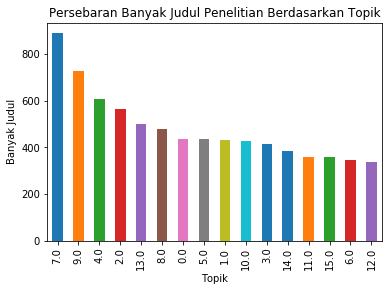

In [18]:
count_topics.plot.bar()

plt.xlabel('Topik')
plt.ylabel('Banyak Judul')
plt.title('Persebaran Banyak Judul Penelitian Berdasarkan Topik')

# The most representative sentence for each topic

In [19]:
# Display setting to show more characters in column
# Mallet
pd.options.display.max_colwidth = 100

sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf.head(20)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9609,"platform_android, e_commerce, studi_kasus, aplikasi, pembuatan_aplikasi, umum_kota, pemesanan_ma...","[analisis, perancangan, e, commerce, industri, konveksi, nina, jaya, perusahaan, konveksi, pakai..."
1,1.0,0.9609,"metode_ahp, universitas_widyatama, metode_saw, pengolahan_data, studi_kasus, sekolah_menengah, i...","[pengenalan, wajah, manusia, principal, component, analysis, jaringan, syaraf, tiruan, adaptive,..."
2,2.0,0.9574,"sms_gateway, hasil_belajar, analisa_perancangan, basis_data, rancang_bangun, sms, mata_pelajaran...","[perancangan, sistem, informasi, absensi, finger, print, badan, perencanaan, pembangunan, daerah..."
3,3.0,0.9531,"rekayasa_perangkat, fakultas_teknik, studi_kasus, rancang_bangun, metode_certainty, perpustakaan...","[aplikasi, sistem, pakar, diagnosa, penyakit, tht, telinga, hidung, tenggorokan, java, netbeans,..."
4,4.0,0.9609,"operasi_android, rancang_bangun, program_studi, android, sistem_operasi, operasi, informasi_geog...","[program, studi, teknik, informatika, fakultas, sains, teknologi, uin, sunan, kalijaga, yogyakar..."
5,5.0,0.9554,"penilaian_kinerja, studi_kasus, kereta_api, analisis_perbandingan, informasi, cloud_computing, s...","[analisa, sistem, e, learning, aritmatika, metode, jarimatika, tingkat, sekolah, dasar, pendekat..."
6,6.0,0.9554,"informasi_penjualan, penjualan, berorientasi_objek, persediaan_barang, jurusan_teknik, matriks, ...","[perancangan, implementasi, sistem, voice, over, internet, protocol, voip, jardiknas, propinsi, ..."
7,7.0,0.9639,"sistem_pendukung, pendukung, keputusan, keputusan_pemilihan, keputusan_penentuan, studi_kasus, p...","[sistem, pendukung, keputusan, letak, lokasi, pasar, swalayan, baru, kota, semarang, metode, sim..."
8,8.0,0.9665,"informasi_akademik, perguruan_tinggi, tugas_akhir, keputusan_penerimaan, bahasa_inggris, akademi...","[analisis, pemodelan, arsitektur, enterprise, mendukung, sistem, informasi, akademik, togaf, ope..."
9,9.0,0.9639,"perangkat_lunak, sistem_pakar, siswa_kelas, pakar, mendiagnosa_penyakit, bahasa_pemrograman, ran...","[rancang, bangun, aplikasi, web, learning, sistem, pakar, kerusakan, motor, honda, bahasa, pemro..."


In [20]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()

data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim-2013.html')

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7     -0.248934 -0.044832       1        1  8.811765
9     -0.031583  0.189358       2        1  7.899075
2      0.058018 -0.030439       3        1  7.008385
4      0.017464 -0.041229       4        1  6.777570
8     -0.049211 -0.023688       5        1  6.625431
13     0.029424 -0.041215       6        1  6.217227
14    -0.009262 -0.036008       7        1  6.154017
1      0.033466 -0.010216       8        1  6.060781
10    -0.009875 -0.002994       9        1  5.981924
5      0.041446 -0.059854      10        1  5.879774
0      0.038822 -0.059113      11        1  5.809096
3      0.006732  0.044247      12        1  5.622275
11     0.012663  0.055416      13        1  5.536863
15     0.047752 -0.007598      14        1  5.271777
12     0.044165  0.007194      15        1  5.214460
6      0.018913  0.060971      16        1  5.129576, topic_info=   

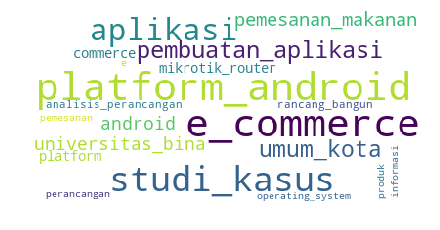

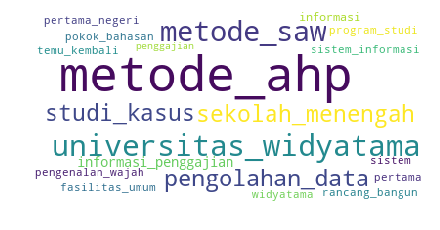

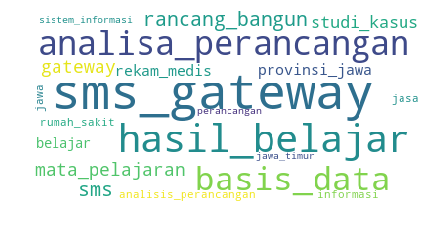

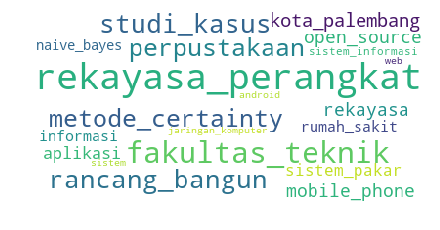

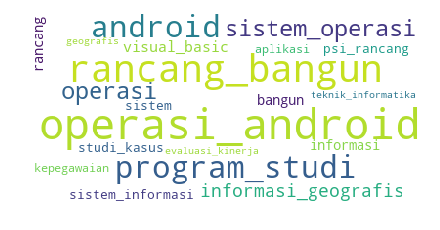

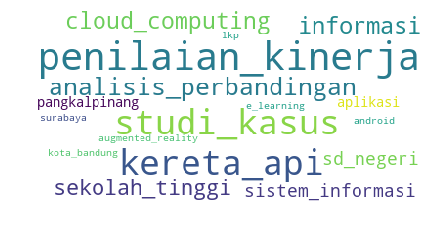

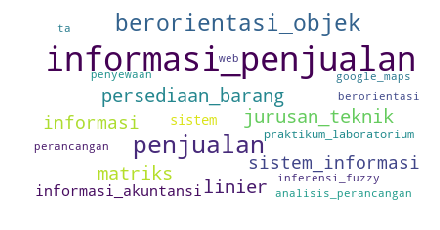

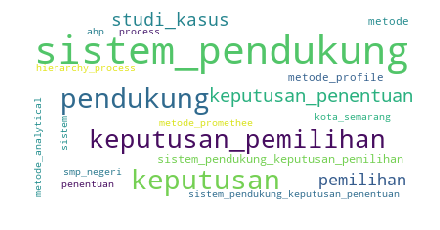

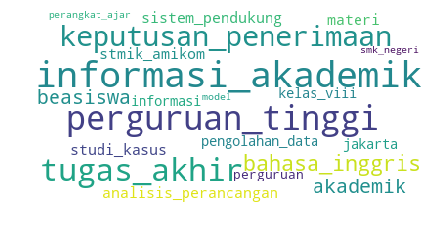

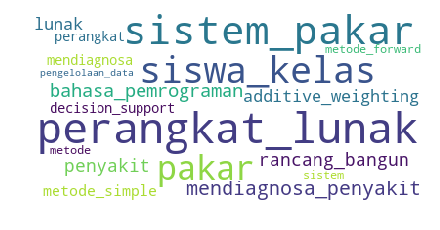

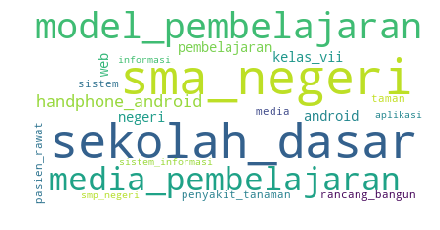

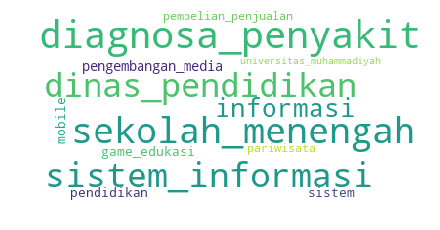

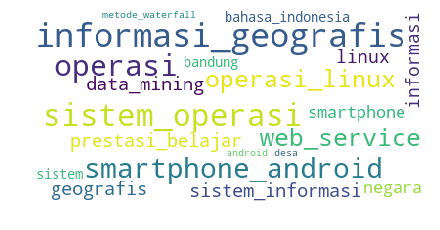

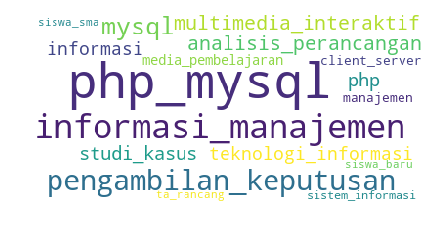

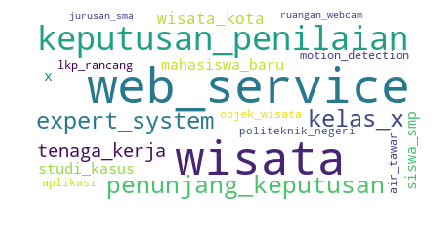

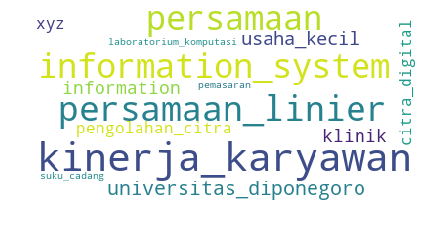

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd

# # lower max_font_size, change the maximum number of word and lighten the background:
# wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

for t in range(model.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=50, max_words=20, background_color="white", min_font_size=10).fit_words(dict(model.show_topic(t,200))))
    plt.axis("off")
#     plt.title("Topic #" + str(t))
#     plt.savefig("wcld-topic-"+str(t)+".png", facecolor='k')
#     plt.tight_layout(pad=0)
    plt.savefig("wcld-topic-"+str(t)+".png", facecolor='none', bbox_inches='tight')
    
# plt.show()

In [22]:
import pickle
filename = 'model2013.pkl'
pickle.dump(model, open(filename, 'wb'))
model.save('lda.model')